<a href="https://colab.research.google.com/github/frendev/Machine_Learning_in_Python/blob/master/Logistic_Regression_TItanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
upload_datset=files.upload()

Saving train.csv to train (1).csv


In [0]:
#Creating a dataframe of train data
df=pd.read_csv('train.csv')

In [37]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
#dropping PassengerId as it is of no use in prediction..
df=df.drop(['PassengerId'], axis = 1) 
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


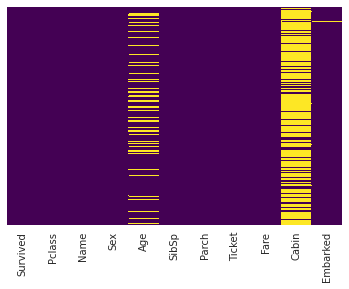

In [39]:
#lets see how many missing or null values are there in our training data
sns.heatmap(df.isnull(),cbar=None,yticklabels=False,cmap='viridis')

In [40]:
#here we can see that lot of cabin values are null.. so this feature is not that much useful in predictions.
df=df.drop(['Cabin'],axis=1)
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


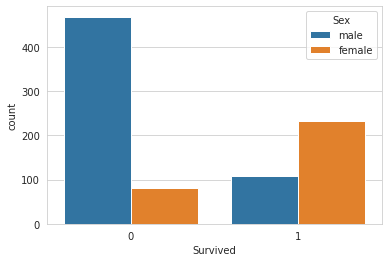

In [41]:
#since this is a classification problem lets get a count of survived and not survived
sns.set_style('whitegrid')

sns.countplot(x='Survived',data=df,hue='Sex')


#we can see here..males have lower number of count compared to females..as it is evident that to get on a lifeboat,females were given the preference first.

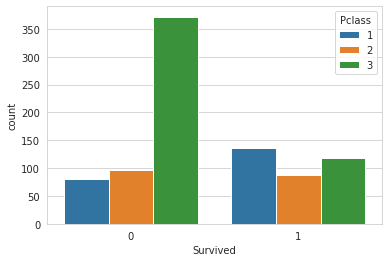

In [42]:
sns.countplot(x='Survived',data=df,hue='Pclass')
#here we can see that Pclass-3 have the less number of people survived.

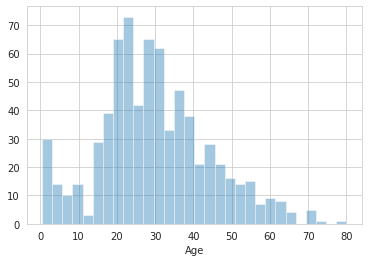

In [43]:
#lets look at the age of people on Titanic

sns.distplot(df['Age'].dropna(),kde=False,bins=30)
# it is seen here that most people were between age of 20 to 40

In [44]:
#lets look at the data we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


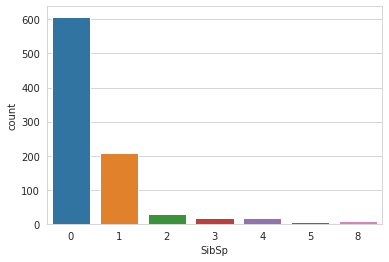

In [45]:
sns.countplot(x='SibSp',data=df)
#this count plot clearley shows that there were more single people and couples

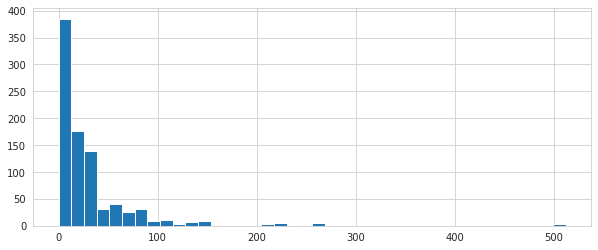

In [46]:
df['Fare'].hist(bins=40,figsize=(10,4))
#here we can see that there were more no of people who belonged to cheaper class and bought lower priced tickets to get on titanic

In [0]:
#imputing age values based on Pclass
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24

  else:
    return Age

In [0]:

df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

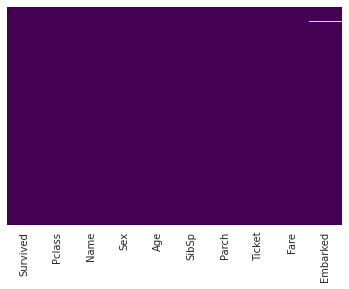

In [49]:
sns.heatmap(df.isnull(),cbar=None,yticklabels=False,cmap='viridis')
#after filled in all the missing values..we get a complete cleaned data :)

In [50]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [51]:
#lets convert textual values into dummy variables since model only understands numerical values

#converting Sex
Sex=pd.get_dummies(df['Sex'],drop_first='True')
Sex.columns=['male']
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [0]:
#converting Embarked
Embarked=pd.get_dummies(df['Embarked'],drop_first='True')


In [0]:
df=pd.concat([df,Sex,Embarked],axis=1)

In [54]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [0]:
df=df.drop(['Embarked','Sex','Name','Ticket'],axis=1)

In [0]:

df=df.drop([0,1,2,3,4,5,6],axis=1)


In [88]:
df.head()

,Survived,Pclass,Age,SibSp,Fare,male,Q,S
0,0,3,22.0,1,7.2500,1,0,1
1,1,1,38.0,1,71.2833,0,0,0
2,1,3,26.0,0,7.9250,0,0,1
3,1,1,35.0,1,53.1000,0,0,1
4,0,3,35.0,0,8.0500,1,0,1


In [0]:
#lets create Training and testing set

X=df.drop(['Survived'],axis=1)
y=df['Survived']


In [0]:
# from sklearn.model_selection import train_test_split 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 101)


In [0]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [91]:
log_model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
upload_test=files.upload()

Saving test.csv to test (1).csv


In [0]:
X_test=pd.read_csv('test.csv')


In [94]:
X_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


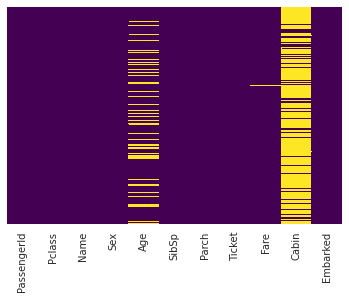

In [95]:
sns.heatmap(X_test.isnull(),cbar=None,yticklabels=False,cmap='viridis')

In [0]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24

  else:
    return Age
X_test['Age']=X_test[['Age','Pclass']].apply(impute_age,axis=1)

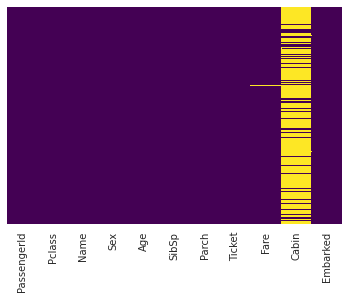

In [97]:
sns.heatmap(X_test.isnull(),cbar=None,yticklabels=False,cmap='viridis')

In [0]:
X_test=X_test.drop(['PassengerId'],axis=1)

In [99]:
X_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [100]:
#lets convert textual values into dummy variables since model only understands numerical values

#converting Sex
Sex=pd.get_dummies(X_test['Sex'],drop_first='True')
Sex.columns=['male']
Sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [101]:
#converting Embarked
Embarked=pd.get_dummies(X_test['Embarked'],drop_first='True')
Embarked.head()


,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [0]:
X_test=X_test.drop(['Embarked','Sex','Name','Ticket',],axis=1)

In [0]:
X_test=pd.concat([X_test,Sex,Embarked],axis=1)

In [104]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,3,34.5,0,0,7.8292,NaN,1,1,0
1,3,47.0,1,0,7.0000,NaN,0,0,1
2,2,62.0,0,0,9.6875,NaN,1,1,0
3,3,27.0,0,0,8.6625,NaN,1,0,1
4,3,22.0,1,1,12.2875,NaN,0,0,1


In [0]:
X_test=X_test.drop(['Parch'],axis=1)


In [107]:
X_test.head()

,Pclass,Age,SibSp,Fare,Cabin,male,Q,S
0,3,34.5,0,7.8292,NaN,1,1,0
1,3,47.0,1,7.0000,NaN,0,0,1
2,2,62.0,0,9.6875,NaN,1,1,0
3,3,27.0,0,8.6625,NaN,1,0,1
4,3,22.0,1,12.2875,NaN,0,0,1


In [0]:
X_test=X_test.drop(['Cabin'],axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
Pclass    417 non-null int64
Age       417 non-null float64
SibSp     417 non-null int64
Fare      417 non-null float64
male      417 non-null uint8
Q         417 non-null uint8
S         417 non-null uint8
dtypes: float64(2), int64(2), uint8(3)
memory usage: 17.5 KB


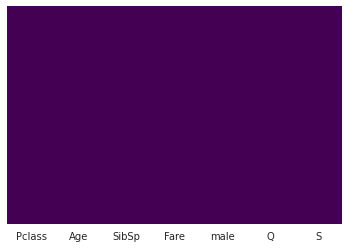

In [114]:
sns.heatmap(X_test.isnull(),cbar=None,yticklabels=False,cmap='viridis')
X_test.info()
predictions=log_model.predict(X_test)


In [115]:
upload_test=files.upload()

Saving gender_submission.csv to gender_submission.csv


In [0]:
actual_x_test=pd.read_csv('gender_submission.csv')

In [117]:
actual_x_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [118]:
actual_x_test=actual_x_test.drop(['PassengerId'],axis=1)


ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [0]:
actual_x_test = actual_x_test.drop(2)


In [122]:
from sklearn.metrics import classification_report
print(classification_report(actual_x_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       265
           1       0.68      0.70      0.69       152

    accuracy                           0.77       417
   macro avg       0.75      0.76      0.76       417
weighted avg       0.77      0.77      0.77       417



In [127]:
#let's print the values of confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(actual_x_test,predictions)
print(cm)

[[215  50]
 [ 45 107]]


In [129]:
#lets calcualte the accuracy
#TP=215,=107,FP=45,FN=50
print('The accuracy of our model is- 77.21 %')

The accuracy of our model is- 77.21 %
